# Gaussian image denoising

In [1]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
#from ipywidgets import *
import cv2
import time
#import kernels
from skimage import io as skimage_io

In [2]:
img = skimage_io.imread("http://www.hpca.ual.es/~vruiz/images/barb.png")

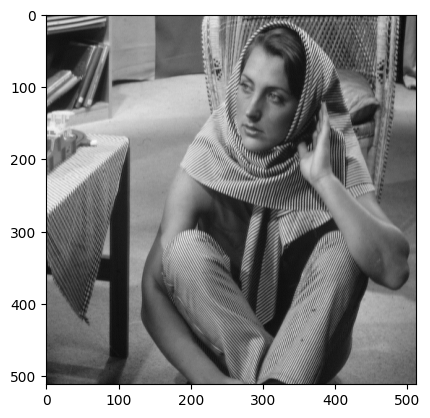

In [3]:
plt.imshow(img, cmap="gray")

In [4]:
mean = 0
var = 1000
sigma = var**0.5
noise = np.random.normal(mean,sigma,img.shape).reshape(img.shape)
noisy_img = np.clip(a=img.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)

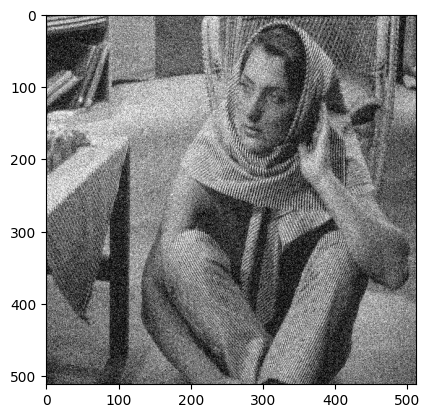

In [5]:
plt.imshow(noisy_img, cmap="gray")

In [6]:
import denoising.image.gaussian as gaussian_denoising

In [7]:
import logging

In [8]:
sigma = 2.0

In [9]:
denoiser = gaussian_denoising.Monochrome_Image_Gaussian_Denoising(
    sigma=sigma, verbosity=logging.INFO)

[gaussian.py:95 __init__()] sigma=2.0


logging level = 20


[6.69162896e-05 4.36349021e-04 2.21596317e-03 8.76430436e-03
 2.69959580e-02 6.47599366e-02 1.20987490e-01 1.76035759e-01
 1.99474648e-01 1.76035759e-01 1.20987490e-01 6.47599366e-02
 2.69959580e-02 8.76430436e-03 2.21596317e-03 4.36349021e-04
 6.69162896e-05]
1.0


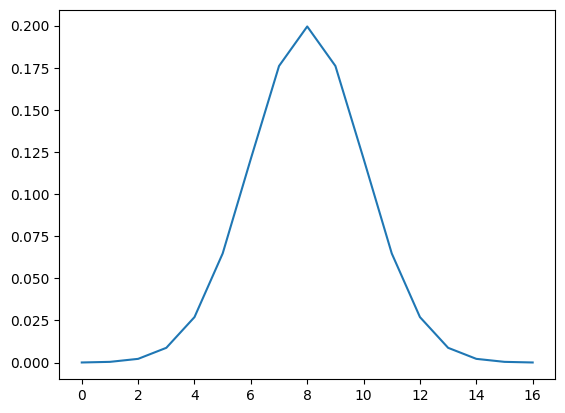

In [10]:
kernel = denoiser.get_gaussian_kernel()
print(kernel)
print(np.sum(kernel))
plt.plot(kernel)
plt.show()

43.265392611105035
49.18559848676657
53.87377194779844


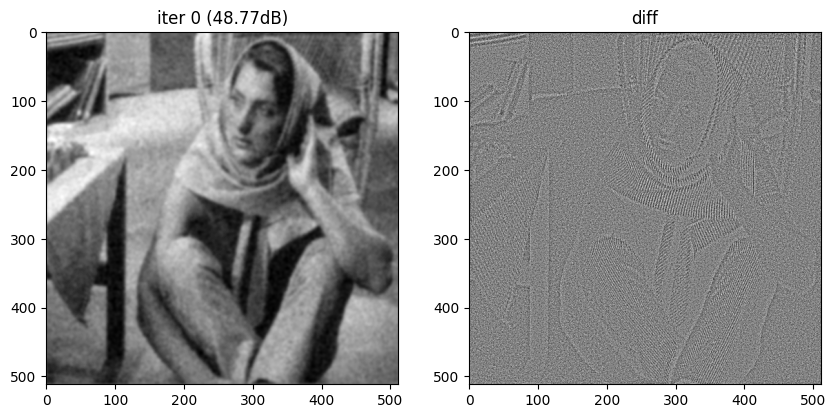

In [11]:
denoised_img, _ = denoiser.filter(noisy_image=noisy_img, GT=img)

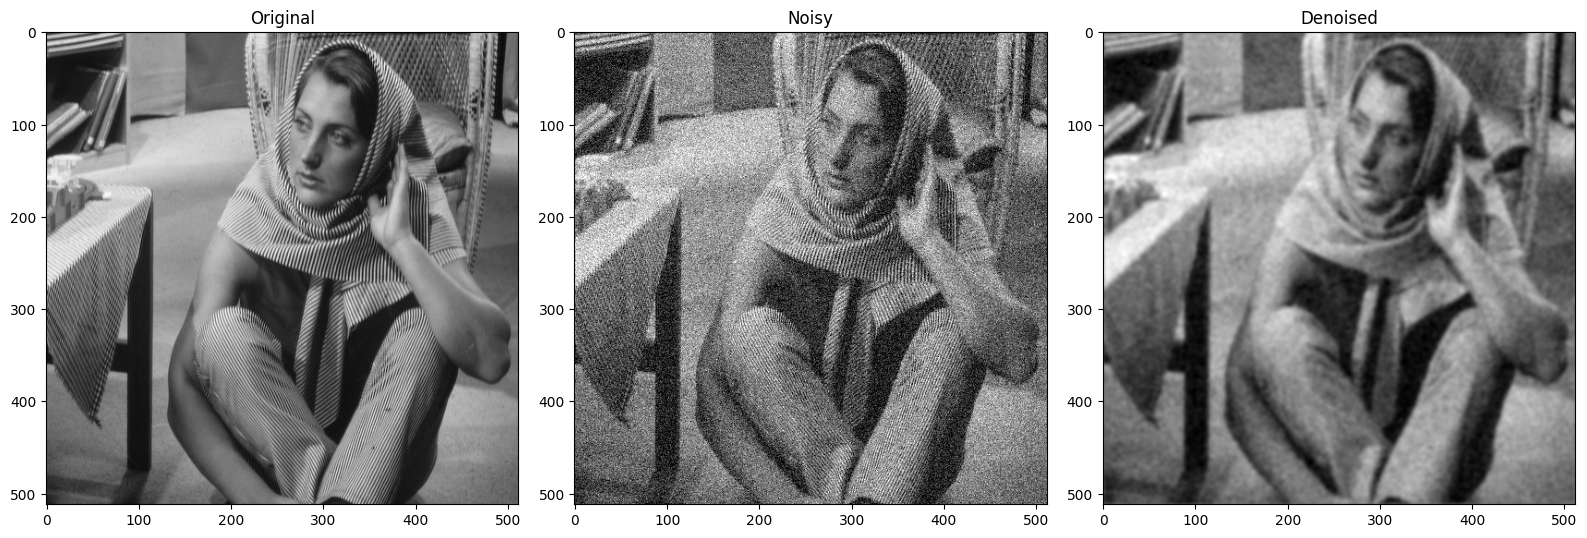

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(img, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(noisy_img, cmap="gray")
axs[1].set_title("Noisy")
axs[2].imshow(denoised_img, cmap="gray")
axs[2].set_title("Denoised")
fig.tight_layout()
plt.show()

In [13]:
img = skimage_io.imread("http://www.hpca.ual.es/~vruiz/images/lena.png")

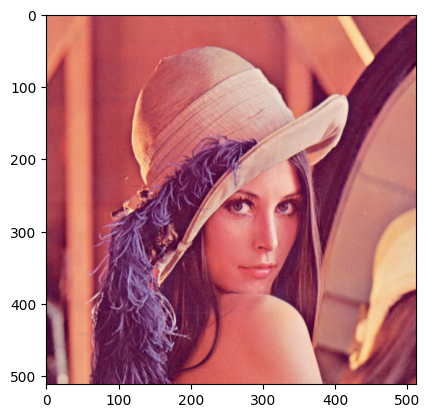

In [14]:
plt.imshow(img)

In [15]:
mean = 0
var = 1000
sigma = var**0.5
noise = np.random.normal(mean,sigma,img.shape).reshape(img.shape)
noisy_img = np.clip(a=img.astype(np.float32) + noise, a_min=0, a_max=255).astype(np.uint8)

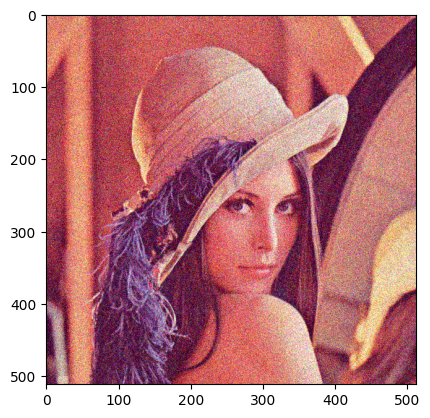

In [16]:
plt.imshow(noisy_img)

In [17]:
sigma = 2.0

In [18]:
denoiser = gaussian_denoising.Color_Image_Gaussian_Denoising(
    sigma=sigma, verbosity=logging.INFO)

[gaussian.py:95 __init__()] sigma=2.0


logging level = 20


64.49682909664502
59.69436255116363
61.81408437930295


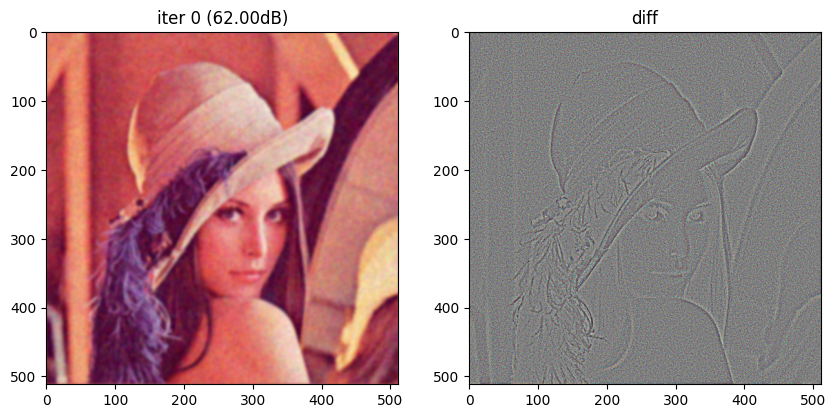

In [23]:
denoised_img, _ = denoiser.filter(noisy_image=noisy_img, GT=img)
denoised_img = denoised_img.astype(np.uint8)

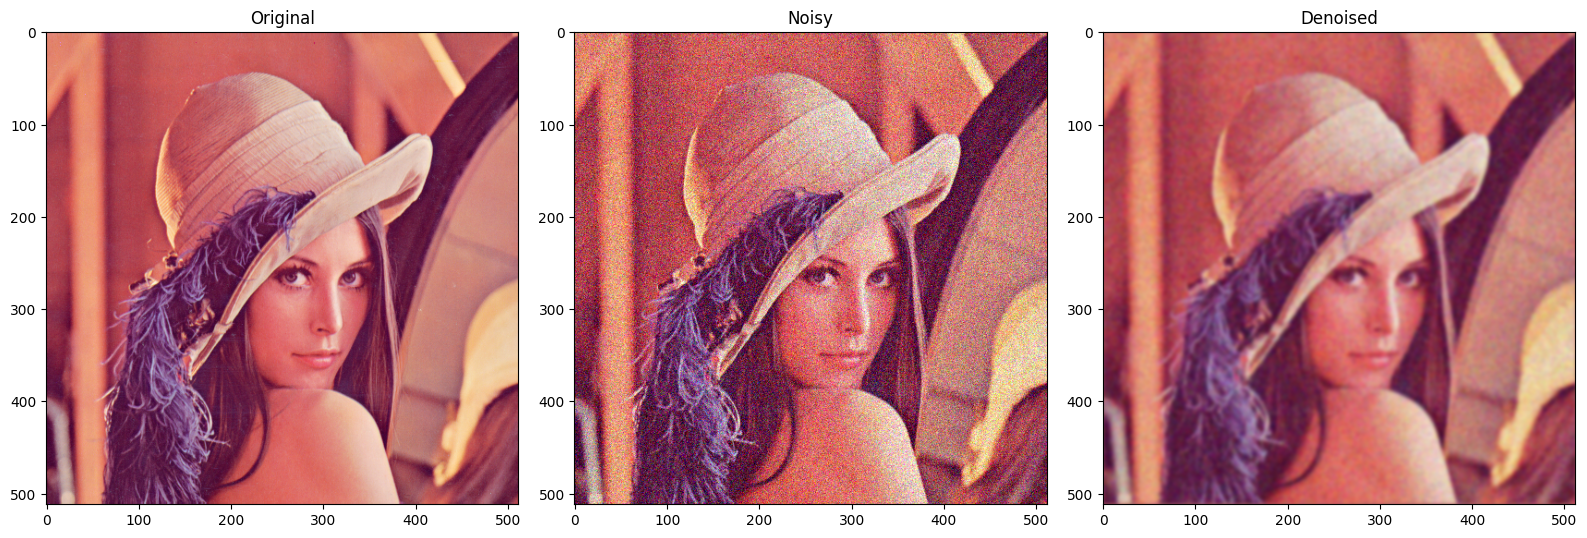

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(16, 32))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(noisy_img)
axs[1].set_title("Noisy")
axs[2].imshow(denoised_img)
axs[2].set_title("Denoised")
fig.tight_layout()
plt.show()